# Exploratory Analysis of Covid 19 World data and next 30 days forecasting

#### 24-02-2020 to 16-09-2021

#### Data obtained from https://ourworldindata.org/coronavirus-source-data

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
print(fbprophet.__version__)
print(pd.__version__)

0.6
1.1.3


In [3]:
data = pd.read_csv("../Downloads/owid-covid-data.csv")

In [4]:
data.shape

(117236, 62)

In [5]:
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [6]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
117231,ZWE,Africa,Zimbabwe,2021-09-12,126269.0,49.0,102.714,4538.0,2.0,8.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117232,ZWE,Africa,Zimbabwe,2021-09-13,126399.0,130.0,104.000,4543.0,5.0,7.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117233,ZWE,Africa,Zimbabwe,2021-09-14,126817.0,418.0,145.857,4550.0,7.0,6.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117234,ZWE,Africa,Zimbabwe,2021-09-15,127083.0,266.0,164.571,4551.0,1.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117235,ZWE,Africa,Zimbabwe,2021-09-16,127368.0,285.0,187.429,4560.0,9.0,5.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117236 entries, 0 to 117235
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               117236 non-null  object 
 1   continent                              111874 non-null  object 
 2   location                               117236 non-null  object 
 3   date                                   117236 non-null  object 
 4   total_cases                            111479 non-null  float64
 5   new_cases                              111476 non-null  float64
 6   new_cases_smoothed                     110461 non-null  float64
 7   total_deaths                           100811 non-null  float64
 8   new_deaths                             100966 non-null  float64
 9   new_deaths_smoothed                    110461 non-null  float64
 10  total_cases_per_million                110891 non-null  

In [8]:
columns_to_drop = [col for col in data.columns if data[col].notnull().sum()<10000]

In [9]:
X = data.drop(columns_to_drop, axis=1)

In [10]:
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [11]:
len(data['iso_code'].unique())

233

In [12]:
cols = ['World', 'Europe', 'European Union', 'Asia', 'North America', 'South America', 'Africa', 'International' ]
p = data.index[data['location'].isin(cols)].tolist()

In [13]:
f = data.drop(p)

In [14]:
total_cases_countrywise = f.groupby('location').total_cases.max()

## The country with the maximum number of deaths:

In [15]:
max_deaths = f.groupby('location').total_deaths.max().sort_values(ascending=False)
max_deaths_country = max_deaths.idxmax()
max_deaths

location
United States               670000.0
Brazil                      589246.0
India                       444248.0
Mexico                      270348.0
Peru                        198891.0
                              ...   
Turkmenistan                     NaN
Turks and Caicos Islands         NaN
Tuvalu                           NaN
Vatican                          NaN
Wallis and Futuna                NaN
Name: total_deaths, Length: 225, dtype: float64

In [16]:
print("Number of deaths:",max_deaths.max())
print("Country:",max_deaths_country)

Number of deaths: 670000.0
Country: United States


## The country with the minimum number of deaths:

In [17]:
min_deaths = f.groupby('location').total_deaths.max().sort_values()
min_deaths_country = min_deaths.idxmin()
min_deaths

location
Vanuatu                              1.0
Bhutan                               3.0
Dominica                             8.0
Saint Kitts and Nevis                9.0
Saint Vincent and the Grenadines    13.0
                                    ... 
Turkmenistan                         NaN
Turks and Caicos Islands             NaN
Tuvalu                               NaN
Vatican                              NaN
Wallis and Futuna                    NaN
Name: total_deaths, Length: 225, dtype: float64

In [18]:
print("Number of deaths:",min_deaths.min())
print("Country:",min_deaths_country)

Number of deaths: 1.0
Country: Vanuatu


## Country with maximum number of cases

In [19]:
print("Country with maximum number of cases:",total_cases_countrywise.idxmax())
print("Number of cases:",total_cases_countrywise.max())

Country with maximum number of cases: United States
Number of cases: 41785903.0


## Country with minimum number of cases

In [20]:
print("Country with minimum number of cases:",total_cases_countrywise.idxmin())
print("Number of cases:",total_cases_countrywise.min())

Country with minimum number of cases: Micronesia (country)
Number of cases: 1.0


## Total number of deaths and cases in India

In [21]:
print("Total number of deaths:", min_deaths.loc['India'])
print("Total number of cases:", total_cases_countrywise['India'])

Total number of deaths: 444248.0
Total number of cases: 33381728.0


In [22]:
data.date.unique().min()

'2020-01-01'

In [23]:
data[data['location']=='World'].index

Int64Index([115013, 115014, 115015, 115016, 115017, 115018, 115019, 115020,
            115021, 115022,
            ...
            115607, 115608, 115609, 115610, 115611, 115612, 115613, 115614,
            115615, 115616],
           dtype='int64', length=604)

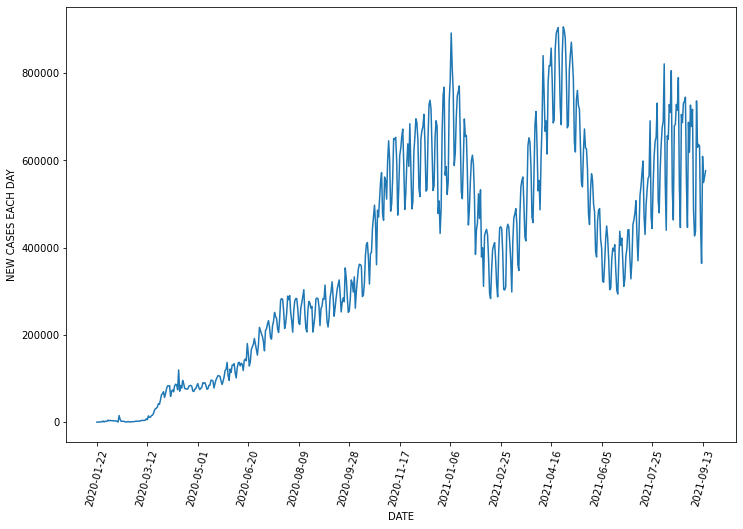

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data.loc[115013:115616,'date'], y=data.loc[115013:115616,'new_cases'])
plt.xticks(data.loc[115013:115616,'date'][::50], rotation=75)
plt.xlabel('DATE')
plt.ylabel('NEW CASES EACH DAY')
plt.show()

In [25]:
df = data.copy()
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.rename(columns = {'date':'ds', 'new_cases':'y'})
df_world = df.loc[115013:115616,['ds','y']]
df_world

,ds,y
115013,2020-01-22,0.0
115014,2020-01-23,98.0
115015,2020-01-24,286.0
115016,2020-01-25,492.0
115017,2020-01-26,685.0
...,...,...
115612,2021-09-12,363885.0
115613,2021-09-13,609291.0
115614,2021-09-14,549167.0
115615,2021-09-15,563272.0


In [26]:
model = Prophet()
model.fit(df_world)
future = model.make_future_dataframe(periods=30)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future.tail()

,ds
629,2021-10-12
630,2021-10-13
631,2021-10-14
632,2021-10-15
633,2021-10-16


In [28]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-63720.308329,-175929.810276,96794.729745,-63720.308329,-63720.308329,34840.514977,34840.514977,34840.514977,34840.514977,34840.514977,34840.514977,0.0,0.0,0.0,-28879.793352
1,2020-01-23,-62116.587176,-160073.624899,125634.676110,-62116.587176,-62116.587176,42488.882058,42488.882058,42488.882058,42488.882058,42488.882058,42488.882058,0.0,0.0,0.0,-19627.705118
2,2020-01-24,-60512.866023,-150712.174006,131626.124258,-60512.866023,-60512.866023,43717.777948,43717.777948,43717.777948,43717.777948,43717.777948,43717.777948,0.0,0.0,0.0,-16795.088075
3,2020-01-25,-58909.144870,-206939.713454,55664.947787,-58909.144870,-58909.144870,-12374.451557,-12374.451557,-12374.451557,-12374.451557,-12374.451557,-12374.451557,0.0,0.0,0.0,-71283.596427
4,2020-01-26,-57305.423717,-254491.574407,15772.792812,-57305.423717,-57305.423717,-65577.187658,-65577.187658,-65577.187658,-65577.187658,-65577.187658,-65577.187658,0.0,0.0,0.0,-122882.611375


## Forecast for next 30 days for World

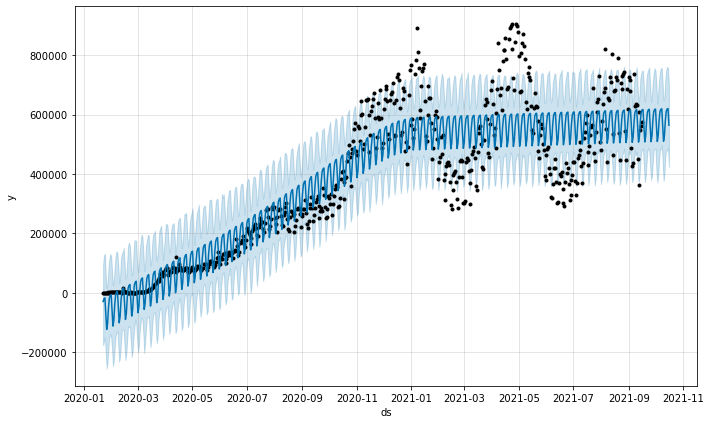

In [29]:
#plotting the generated forecast
fig = model.plot(forecast)

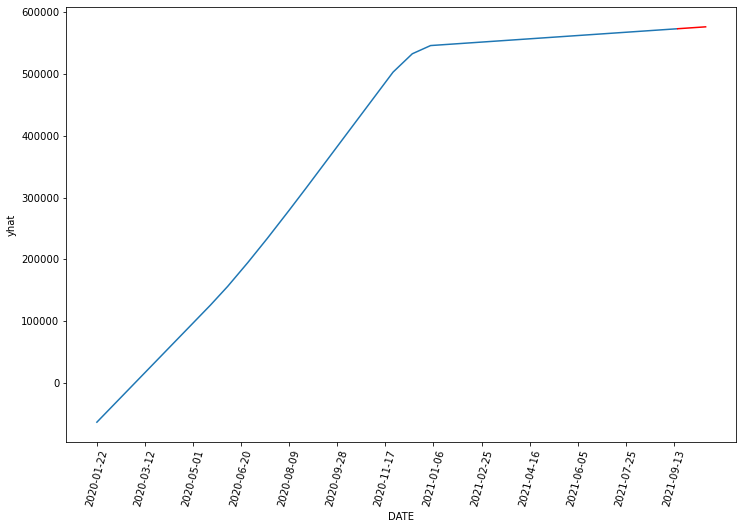

In [30]:
#plotting the forecasted trend
y_pred = forecast['trend']

plt.figure(figsize=(12,8))
plt.plot(forecast.loc[:603,'ds'], y_pred[:-30])
plt.plot(forecast.loc[604:,'ds'], y_pred[-30:], color='red')
plt.xticks(forecast['ds'][::50], rotation=75)
plt.xlabel('DATE')
plt.ylabel('yhat')
plt.show()

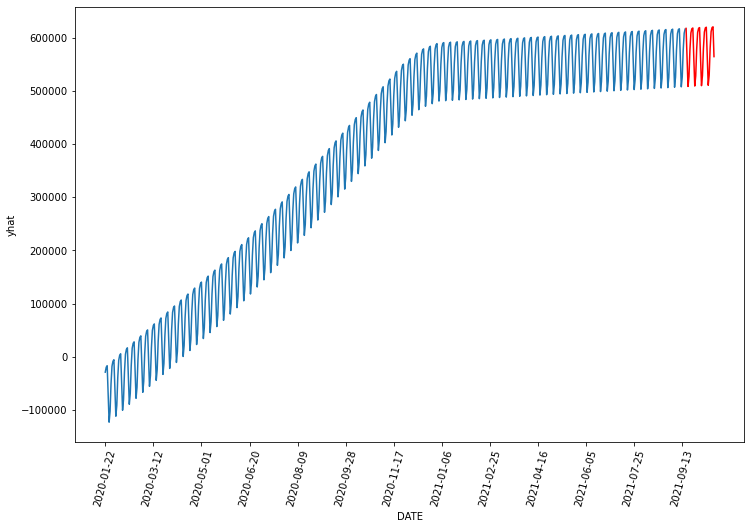

In [31]:
#plotting the forecasted values
y_pred = forecast['yhat']

plt.figure(figsize=(12,8))
plt.plot(forecast.loc[:603,'ds'], y_pred[:-30])
plt.plot(forecast.loc[604:,'ds'], y_pred[-30:], color='red')
plt.xticks(forecast['ds'][::50], rotation=75)
plt.xlabel('DATE')
plt.ylabel('yhat')
plt.show()

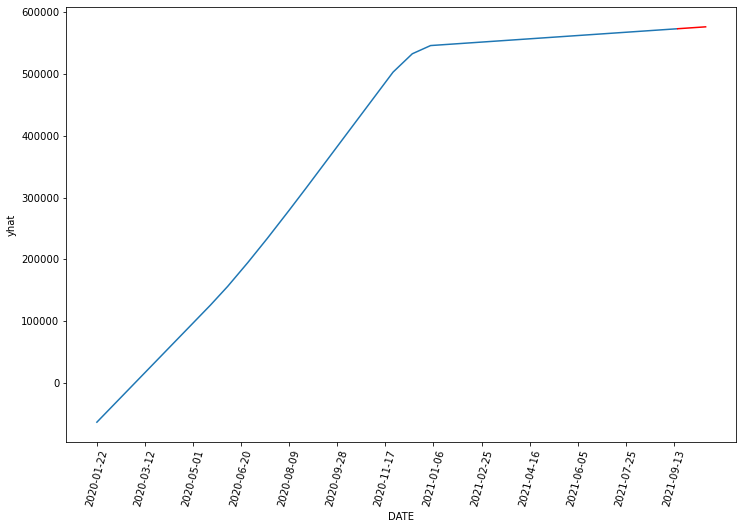

In [32]:
y_pred = forecast['trend']

plt.figure(figsize=(12,8))
plt.plot(forecast.loc[:603,'ds'], y_pred[:-30])
plt.plot(forecast.loc[604:,'ds'], y_pred[-30:], color='red')
plt.xticks(forecast['ds'][::50], rotation=75)
plt.xlabel('DATE')
plt.ylabel('yhat')
plt.show()

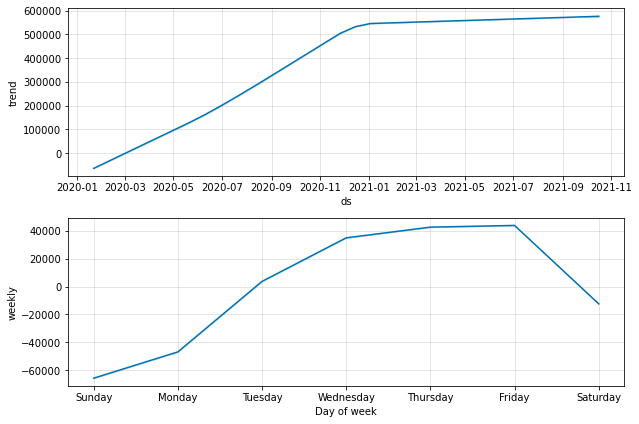

In [33]:
fig = model.plot_components(forecast)

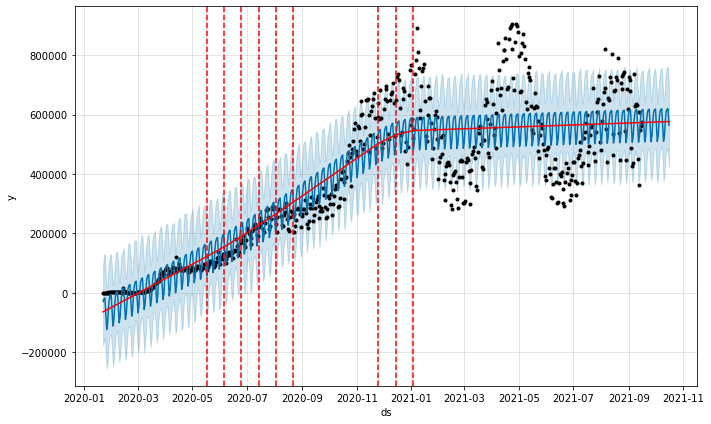

In [34]:
#adding the changepoints to the forecasted plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [35]:
data[data['location']=='India'].index

Int64Index([48480, 48481, 48482, 48483, 48484, 48485, 48486, 48487, 48488,
            48489,
            ...
            49066, 49067, 49068, 49069, 49070, 49071, 49072, 49073, 49074,
            49075],
           dtype='int64', length=596)

In [36]:
df2 = data.copy()
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df2 = df2.rename(columns = {'date':'ds', 'new_cases':'y'})
df_india = df.loc[48480:49066,['ds','y']]
df_india

,ds,y
48480,2020-01-30,1.0
48481,2020-01-31,0.0
48482,2020-02-01,0.0
48483,2020-02-02,1.0
48484,2020-02-03,1.0
...,...,...
49062,2021-09-03,42618.0
49063,2021-09-04,42766.0
49064,2021-09-05,38948.0
49065,2021-09-06,31222.0


In [37]:
model2 = Prophet()
model2.fit(df_india)
future_in = model2.make_future_dataframe(periods=30)
forecast_in = model.predict(future_in)
forecast_in.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-50890.539106,-148236.879376,132702.058216,-50890.539106,-50890.539106,42488.882058,42488.882058,42488.882058,42488.882058,42488.882058,42488.882058,0.0,0.0,0.0,-8401.657048
1,2020-01-31,-49286.817953,-139743.751818,136192.985905,-49286.817953,-49286.817953,43717.777948,43717.777948,43717.777948,43717.777948,43717.777948,43717.777948,0.0,0.0,0.0,-5569.040004
2,2020-02-01,-47683.096800,-192676.887426,70701.404251,-47683.096800,-47683.096800,-12374.451557,-12374.451557,-12374.451557,-12374.451557,-12374.451557,-12374.451557,0.0,0.0,0.0,-60057.548357
3,2020-02-02,-46079.375647,-248268.796684,18191.525258,-46079.375647,-46079.375647,-65577.187658,-65577.187658,-65577.187658,-65577.187658,-65577.187658,-65577.187658,0.0,0.0,0.0,-111656.563305
4,2020-02-03,-44475.654494,-231152.308143,42251.925116,-44475.654494,-44475.654494,-46775.924160,-46775.924160,-46775.924160,-46775.924160,-46775.924160,-46775.924160,0.0,0.0,0.0,-91251.578654


## Forecast for next 30 days for India

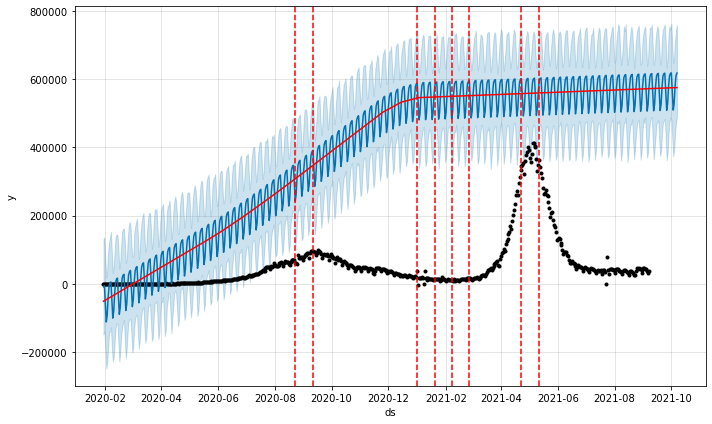

In [38]:
fig2 = model2.plot(forecast_in)
a = add_changepoints_to_plot(fig2.gca(), model2, forecast_in)

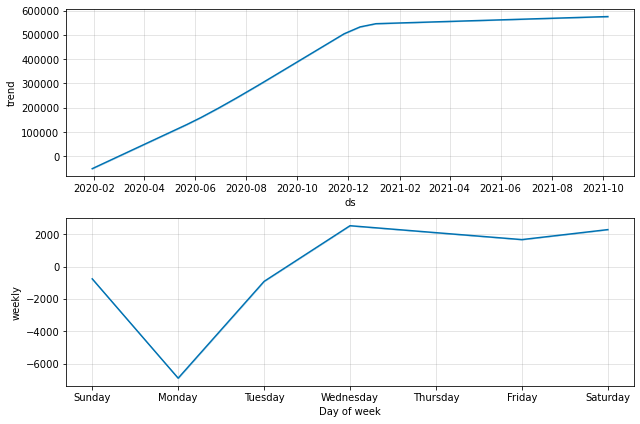

In [39]:
fig2 = model2.plot_components(forecast_in)

## Covid 19 World trends Oct 1st 2020 onwards 

In [40]:
data[data['location']=='World'].loc[data['date']>='2020-10-01'].index

Int64Index([115266, 115267, 115268, 115269, 115270, 115271, 115272, 115273,
            115274, 115275,
            ...
            115607, 115608, 115609, 115610, 115611, 115612, 115613, 115614,
            115615, 115616],
           dtype='int64', length=351)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


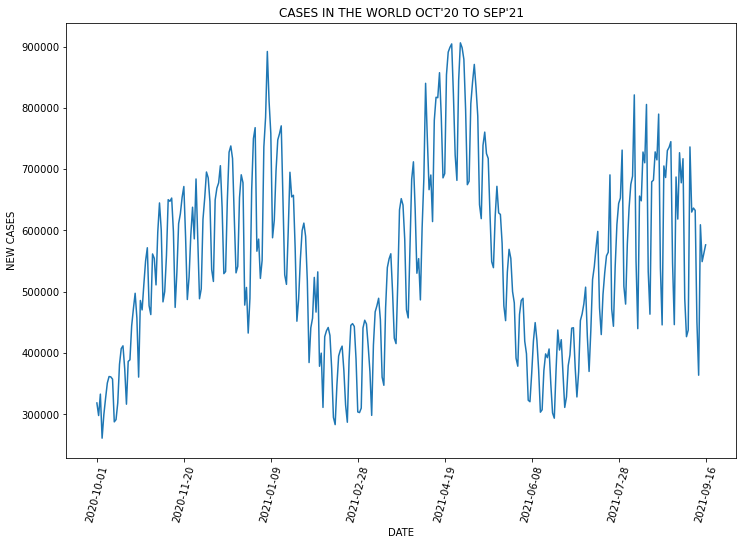

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data.loc[115266:115616,'date'], y=data.loc[115266:115616,'new_cases'])
plt.xticks(data.loc[115266:115616,'date'][::50], rotation=75)
plt.title("CASES IN THE WORLD OCT'20 TO SEP'21")
plt.xlabel('DATE')
plt.ylabel('NEW CASES')
plt.show()

## Covid 19 India trends Oct 1st 2020 onwards

In [42]:
data[data['location']=='India'].loc[data['date']>='2020-10-01'].index

Int64Index([48725, 48726, 48727, 48728, 48729, 48730, 48731, 48732, 48733,
            48734,
            ...
            49066, 49067, 49068, 49069, 49070, 49071, 49072, 49073, 49074,
            49075],
           dtype='int64', length=351)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


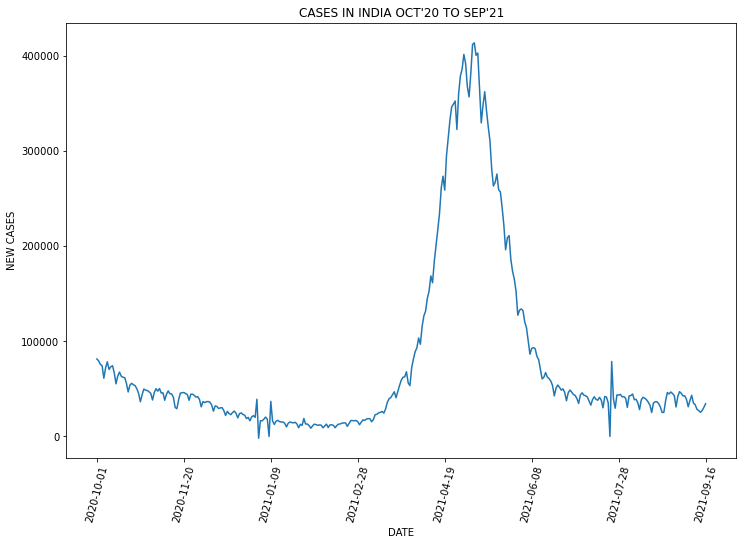

In [43]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data.loc[48725:49075,'date'], y=data.loc[48725:49075,'new_cases'])
plt.xticks(data.loc[48725:49075,'date'][::50], rotation=75)
plt.title("CASES IN INDIA OCT'20 TO SEP'21")
plt.xlabel('DATE')
plt.ylabel('NEW CASES')
plt.show()